In [115]:
import numpy
import urllib
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict

In [116]:
### PCA on beer reviews ###

def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)

print "Reading data..."
data = list(parseData("file:beer_50000.json"))
print "done"

Reading data...
done


In [125]:
def feature(datum):
  text = datum['review/text'].lower().replace(',',' ').replace('?',' ')\
          .replace('!',' ').replace(':',' ').replace('"',' ').replace('.',' ')\
          .replace('(',' ').replace(')',' ').split()
  num_lactic = 0
  num_tart = 0
  num_sour = 0
  num_citric = 0
  num_sweet = 0
  num_acid = 0
  num_hop = 0
  num_fruit = 0
  num_salt = 0
  num_spicy = 0
  for word in text:
    if word == 'lactic':  num_lactic += 1
    if word == 'tart':  num_tart += 1
    if word == 'sour':  num_sour += 1
    if word == 'citric':  num_citric += 1
    if word == 'sweet':  num_sweet += 1
    if word == 'acid':  num_acid += 1
    if word == 'hop':  num_hop += 1
    if word == 'fruit':  num_fruit += 1
    if word == 'salt':  num_salt += 1
    if word == 'spicy':  num_spicy += 1
        
  feat = [num_lactic, num_tart, num_sour, \
         num_citric, num_sweet, num_acid, num_hop, \
         num_fruit, num_salt, num_spicy] 
  return feat

X = [feature(x) for x in data]
y = [d['beer/style'] == 'American IPA' for d in data]

length = int(len(data)/3)

X_train = X[:length]
X_validation = X[length:2*length]
X_test = X[2*length:]

y_train = y[:length]
y_validation = y[length:2*length]
y_test = y[2*length:]

pca = PCA(n_components=10)
pca.fit(X_train)
print pca.components_

[[ -6.58654576e-04   3.82041983e-03  -9.22747912e-03   9.76815710e-03
    8.06320154e-01  -4.24613882e-04   5.86033391e-01   7.24956062e-02
    1.79066612e-04   3.10041403e-02]
 [ -1.52068560e-03  -8.56143562e-03  -1.44207189e-02   1.43485661e-02
   -5.88038768e-01   3.22609343e-04   8.08447920e-01  -2.95632970e-03
   -1.24287628e-03   1.10693182e-02]
 [  3.97573719e-03   4.38402488e-02   8.99763840e-02   3.30346156e-03
   -6.11156245e-02  -1.16662585e-04  -3.92586488e-02   9.91764361e-01
    3.66048694e-04   3.29014837e-02]
 [ -5.02226738e-04   1.97928929e-02  -1.45674162e-02   1.98935619e-02
   -1.66449308e-02  -1.03650256e-04  -2.63046074e-02  -3.48073233e-02
    2.66675480e-03   9.98404912e-01]
 [  2.60128071e-02   2.25692634e-01   9.68674474e-01   3.46674156e-03
    2.95442918e-03   9.46384754e-03   2.13537893e-02  -9.71722898e-02
    7.63446209e-04   6.82647845e-03]
 [  3.20649395e-02   9.72066368e-01  -2.29536760e-01   1.14385274e-02
   -5.92438716e-03   1.00114453e-02   2.00052

In [131]:
cov = pca.get_covariance()
err = 0
for i in range(2,10):
    com = pca.components_[i]
    err += com.dot(cov).dot(numpy.transpose(com))
print "Reconstruction Error = " + str(err)

Reconstruction Error = 0.477154656688


In [128]:
err = 0
for i in range(len(X_train)):
    X_train_new = numpy.transpose(pca.components_[0:2]).dot(pca.components_[0:2].dot(X_train[i]))
    for k in range(len(X_train[i])):
        err += (X_train_new[k]-X[i][k])**2
print err/len(X_train)

0.504943309399


In [126]:
for i in range(len(X_train)):
    average = sum(X_train[i])/len(X_train[i])
    for k in range(len(X_train[i])):
        X_train[i][k] -= average
X_train_T = numpy.transpose(X_train)
cov = X_train_T.dot(X_train)
err = 0
for i in range(2,10):
    com = pca.components_[i]
    err += com.dot(cov).dot(numpy.transpose(com))
print "Reconstruction Error = " + str(err/len(X_train))

Reconstruction Error = 0.504943309399


In [129]:
y = pca.components_[2:10].dot(numpy.transpose(X_train))
for i in range(len(y)):
    ave = sum(y[i])/len(y[i])
    for k in range(len(y[i])):
        y[i][k] = (y[i][k] - ave)**2
err = []
for j in range(len(y)):
    err.append(sum(y[j]))
print sum(err)/len(X_train)

0.489853044608


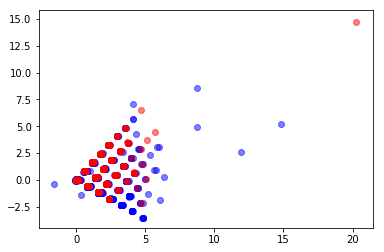

In [140]:
import matplotlib.pyplot as plt
X_2d_nonIPA = []
Y_2d_nonIPA = []
X_2d_IPA = []
Y_2d_IPA = []
for i in range(len(X_train)):
    coord = pca.components_[0:2].dot(X_train[i])
    if y_train[i]:
      X_2d_IPA.append(coord[0])
      Y_2d_IPA.append(coord[1])
    if not y_train[i]:
      X_2d_nonIPA.append(coord[0])
      Y_2d_nonIPA.append(coord[1])
        
plt.scatter(X_2d_nonIPA,Y_2d_nonIPA,marker='o',color='b',alpha=0.5)
plt.scatter(X_2d_IPA,Y_2d_IPA,marker='o',color='r',alpha=0.5)
plt.show()                                     

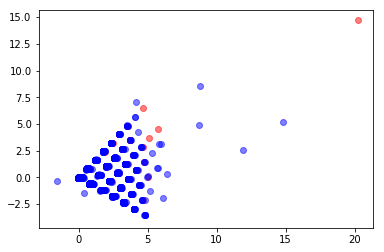

In [139]:
import matplotlib.pyplot as plt
X_2d_nonIPA = []
Y_2d_nonIPA = []
X_2d_IPA = []
Y_2d_IPA = []
for i in range(len(X_train)):
    coord = pca.components_[0:2].dot(X_train[i])
    if y_train[i]:
      X_2d_IPA.append(coord[0])
      Y_2d_IPA.append(coord[1])
    if not y_train[i]:
      X_2d_nonIPA.append(coord[0])
      Y_2d_nonIPA.append(coord[1])
        
plt.scatter(X_2d_IPA,Y_2d_IPA,marker='o',color='r',alpha=0.5)
plt.scatter(X_2d_nonIPA,Y_2d_nonIPA,marker='o',color='b',alpha=0.5)
plt.show()    